In [1]:
# !pip install --upgrade matplotlib tkinter
# !pip install --upgrade typing_extensions

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('D:\Project bach\project\german_credit_data.csv')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\resay\AppData\Local\Temp\ipykernel_4972\987021291.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Project bach\project\german_credit_data.csv')


In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df = df.drop(columns=['Unnamed: 0'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [7]:
df.Job = df.Job.astype('category')

In [8]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [9]:
categorical_columns = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
numerical_columns = ['Age','Credit amount','Duration']

In [10]:
print('Unique values in categorical columns')
for column in categorical_columns:
    print(f"\t{column}: {list(df[column].unique())}\n")

Unique values in categorical columns
	Sex: ['male', 'female']

	Job: [2, 1, 3, 0]

	Housing: ['own', 'free', 'rent']

	Saving accounts: [nan, 'little', 'quite rich', 'rich', 'moderate']

	Checking account: ['little', 'moderate', nan, 'rich']

	Purpose: ['radio/TV', 'education', 'furniture/equipment', 'car', 'business', 'domestic appliances', 'repairs', 'vacation/others']



In [11]:
print('describe the numerical data')
df.describe()

describe the numerical data


,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [12]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [13]:
print(df.isna().sum())

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [14]:
# # dealing with Na to be not avaiable
# df.fillna('not available', inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
nummerical_columns = ['Age','Credit amount','Duration']
corr = df[nummerical_columns].corr()

# plt.figure(figsize=(10,8))
# sns.heatmap(corr,
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values,
#             annot=True,
#             cmap='coolwarm')
# plt.show()


In [17]:
# Create an imputer object that replaces NaN values with the not available
imputer = SimpleImputer(strategy='constant', fill_value='not available')

# Apply the imputer to the categorical columns of df_cleaned
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.3+ KB


In [19]:
mapping = {'good': 1, 'bad': 0}
df['Risk'] = df['Risk'].map(mapping)
df['Risk'] = df['Risk'].astype(bool)

In [20]:
df [categorical_columns] = df[categorical_columns].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   category
 2   Job               1000 non-null   category
 3   Housing           1000 non-null   category
 4   Saving accounts   1000 non-null   category
 5   Checking account  1000 non-null   category
 6   Credit amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   category
 9   Risk              1000 non-null   bool    
dtypes: bool(1), category(6), int64(3)
memory usage: 31.6 KB


In [22]:
# sns.boxplot(data=df[numerical_columns])
# sns.violinplot(data=df[numerical_columns])
# plt.show()

In [23]:
# for col in numerical_columns:
#     plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
#     sns.boxplot(x=df[col])
#     plt.title(f'Box plot of {col}')
#     plt.xlabel(col)
#     plt.show()

In [24]:
def remove_outliers_iqr(df, columns, threshold=1.5):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Remove outliers
df = remove_outliers_iqr(df, numerical_columns)

In [25]:
# for col in numerical_columns:
#     plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
#     sns.boxplot(x=df[col])
#     plt.title(f'Box plot of {col}')
#     plt.xlabel(col)
#     plt.show()

In [26]:
df.describe()

,Age,Credit amount,Duration
count,862.000000,862.000000,862.000000
mean,34.698376,2531.432715,18.116009
std,10.264763,1663.627810,8.690069
min,19.000000,250.000000,4.000000
25%,27.000000,1308.250000,12.000000
50%,33.000000,2066.500000,18.000000
75%,41.000000,3355.000000,24.000000
max,64.000000,7882.000000,42.000000


In [27]:
x = df.drop(columns =['Risk'])
y = df['Risk']

In [28]:
x_transformed = x.copy()

In [29]:
from sklearn.preprocessing import LabelEncoder


In [30]:
job_labels = {
    0: "unskilled (non-resident)",
    1: "unskilled (resident)",
    2: "skilled",
    3: "highly skilled"
}
checking_account_mapping = {
    "not available": 0,
    "little": 1,
    "moderate": 2,
    "rich": 3
}
saving_account_mapping = {
    "not available": 0,
    "little": 1,
    "moderate": 2,
    "quite rich":3,
    "rich": 4
}


In [31]:
x_transformed['Job'] = [job_labels[label] for label in x_transformed['Job']]
x_transformed

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
2,49,male,unskilled (resident),own,little,not available,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car
6,53,male,skilled,own,quite rich,not available,2835,24,furniture/equipment
7,35,male,highly skilled,rent,little,moderate,6948,36,car
...,...,...,...,...,...,...,...,...,...
993,30,male,highly skilled,own,little,little,3959,36,furniture/equipment
994,50,male,skilled,own,not available,not available,2390,12,car
995,31,female,unskilled (resident),own,little,not available,1736,12,furniture/equipment
996,40,male,highly skilled,own,little,little,3857,30,car


In [32]:

# x_transformed["Checking account"] = [checking_account_mapping[label] for label in x_transformed["Checking account"]]

# x_transformed

In [33]:
# x_transformed["Saving accounts"] = [saving_account_mapping[label] for label in x_transformed["Saving accounts"]]

In [34]:
x_transformed

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
2,49,male,unskilled (resident),own,little,not available,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car
6,53,male,skilled,own,quite rich,not available,2835,24,furniture/equipment
7,35,male,highly skilled,rent,little,moderate,6948,36,car
...,...,...,...,...,...,...,...,...,...
993,30,male,highly skilled,own,little,little,3959,36,furniture/equipment
994,50,male,skilled,own,not available,not available,2390,12,car
995,31,female,unskilled (resident),own,little,not available,1736,12,furniture/equipment
996,40,male,highly skilled,own,little,little,3857,30,car


In [35]:
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# # Fit the encoder to the data (optional)
# ordinal_encoder.fit(x_transformed)
# encoded_checking_accounts = ordinal_encoder.transform(x_transformed[["Checking account"]])
# encoded_saving_accounts = ordinal_encoder.transform(x_transformed[['Saving accounts']])
# #encoded_job= ordinal_encoder.transform(x_transformed[['Job']])

In [36]:
x_transformed.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [37]:
cat = ['Sex','Housing','Purpose','Saving accounts', 'Checking account','Job']
x_transformed = pd.get_dummies(x_transformed,columns=cat)

In [38]:
x_transformed.columns

Index(['Age', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_not available',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_not available', 'Checking account_rich',
       'Job_highly skilled', 'Job_skilled', 'Job_unskilled (non-resident)',
       'Job_unskilled (resident)'],
      dtype='object')

In [39]:
x_transformed.head()

,Age,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,...,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_not available,Checking account_rich,Job_highly skilled,Job_skilled,Job_unskilled (non-resident),Job_unskilled (resident)
2,49,2096,12,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,45,7882,42,False,True,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,53,4870,24,False,True,True,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
6,53,2835,24,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,True,False,False
7,35,6948,36,False,True,False,False,True,False,True,...,False,False,False,True,False,False,True,False,False,False


In [40]:
x_transformed.head()

,Age,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,...,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_not available,Checking account_rich,Job_highly skilled,Job_skilled,Job_unskilled (non-resident),Job_unskilled (resident)
2,49,2096,12,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,45,7882,42,False,True,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,53,4870,24,False,True,True,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
6,53,2835,24,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,True,False,False
7,35,6948,36,False,True,False,False,True,False,True,...,False,False,False,True,False,False,True,False,False,False


In [41]:
# pip install imblearn

In [42]:
# Up-sampling with SMOTE
from imblearn.over_sampling import SMOTE

In [43]:
sm = SMOTE(random_state=42)
x_transformed, y = sm.fit_resample(x_transformed, y)


In [44]:
x_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             1268 non-null   int64
 1   Credit amount                   1268 non-null   int64
 2   Duration                        1268 non-null   int64
 3   Sex_female                      1268 non-null   bool 
 4   Sex_male                        1268 non-null   bool 
 5   Housing_free                    1268 non-null   bool 
 6   Housing_own                     1268 non-null   bool 
 7   Housing_rent                    1268 non-null   bool 
 8   Purpose_business                1268 non-null   bool 
 9   Purpose_car                     1268 non-null   bool 
 10  Purpose_domestic appliances     1268 non-null   bool 
 11  Purpose_education               1268 non-null   bool 
 12  Purpose_furniture/equipment     1268 non-null   bool 
 13  Pur

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2, random_state=42)

In [46]:
# cat = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
# x_train = pd.get_dummies(x_train,columns=cat)
# x_test = pd.get_dummies(x_test,columns=cat)
# x_train.columns

In [47]:
x_test.columns

Index(['Age', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_not available',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_not available', 'Checking account_rich',
       'Job_highly skilled', 'Job_skilled', 'Job_unskilled (non-resident)',
       'Job_unskilled (resident)'],
      dtype='object')

In [48]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [49]:
x_train_np = x_train.to_numpy().astype('float32')
y_train_np = y_train.to_numpy().astype('float32')
x_test_np = x_test.to_numpy().astype('float32')
y_test_np = y_test.to_numpy().astype('float32')

In [50]:
np.save('x_train_np', x_train_np)
np.save('x_test_np', x_test_np)
np.save('y_train_np', y_train_np)
np.save('y_test_np', y_test_np)
x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv',index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv',index=False)

In [51]:
model = keras.Sequential([
  keras.layers.Dense(units=64, activation='relu', input_shape=(x_train_np.shape[1],)),
  keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=16, activation='relu'),
  keras.layers.Dense(units=1, activation='sigmoid')
])

d:\python install\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
print("x_train_np dtype:", x_train_np.dtype)
print("y_train_np dtype:", y_train_np.dtype)
print("x_train_np shape:", x_train_np.shape)
print("y_train_np shape:", y_train_np.shape)
print("x_test_np dtype:", x_test_np.dtype)
print("y_test_np dtype:", y_test_np.dtype)
print("x_test_np shape:", x_test_np.shape)
print("y_test_np shape:", y_test_np.shape)


x_train_np dtype: float32
y_train_np dtype: float32
x_train_np shape: (1014, 29)
y_train_np shape: (1014,)
x_test_np dtype: float32
y_test_np dtype: float32
x_test_np shape: (254, 29)
y_test_np shape: (254,)


In [55]:
model.fit(x_train_np, y_train_np, epochs=90, batch_size=30,
          validation_data=(x_test_np, y_test_np),verbose =2)

Epoch 1/90
34/34 - 10s - 304ms/step - accuracy: 0.5237 - loss: 14.7432 - val_accuracy: 0.5157 - val_loss: 8.9588
Epoch 2/90
34/34 - 0s - 8ms/step - accuracy: 0.5000 - loss: 3.7724 - val_accuracy: 0.5157 - val_loss: 3.4535
Epoch 3/90
34/34 - 0s - 7ms/step - accuracy: 0.5256 - loss: 2.2183 - val_accuracy: 0.4882 - val_loss: 3.2659
Epoch 4/90
34/34 - 0s - 7ms/step - accuracy: 0.4793 - loss: 2.3240 - val_accuracy: 0.5157 - val_loss: 2.7481
Epoch 5/90
34/34 - 0s - 7ms/step - accuracy: 0.5296 - loss: 1.7192 - val_accuracy: 0.4843 - val_loss: 2.7212
Epoch 6/90
34/34 - 0s - 7ms/step - accuracy: 0.5286 - loss: 1.8381 - val_accuracy: 0.5236 - val_loss: 0.8898
Epoch 7/90
34/34 - 0s - 7ms/step - accuracy: 0.5168 - loss: 1.8850 - val_accuracy: 0.5157 - val_loss: 3.1853
Epoch 8/90
34/34 - 0s - 7ms/step - accuracy: 0.5168 - loss: 1.5761 - val_accuracy: 0.5276 - val_loss: 0.7315
Epoch 9/90
34/34 - 0s - 6ms/step - accuracy: 0.5099 - loss: 2.1536 - val_accuracy: 0.4843 - val_loss: 2.2519
Epoch 10/90
34/

In [56]:
model.save('good-bad risk model.keras')

In [57]:
# from keras.models import load_model
# model = load_model('good-bad risk model.keras')
# # Load the NumPy files
# x_train_np = np.load('x_train_np.npy')
# x_test_np = np.load('x_test_np.npy')
# y_train_np = np.load('y_train_np.npy')
# y_test_np = np.load('y_test_np.npy')

In [58]:
# x_train = pd.read_csv('x_train.csv')
# y_train = pd.read_csv('y_train.csv')
# x_test = pd.read_csv('x_test.csv')
# y_test = pd.read_csv('y_test.csv')
y_test

1212    False
802     False
422      True
974     False
808      True
        ...  
163      True
486      True
624     False
221      True
243      True
Name: Risk, Length: 254, dtype: bool

In [59]:
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test_np, y_test_np, verbose=2)
print("Test Accuracy:", accuracy)

# Generate predictions on the test data
predictions = model.predict(x_test_np)
#predictions_unscaled = scaler.inverse_transform(predictions)

# Calculate confusion matrix (for classification problems)
cm = confusion_matrix(y_test, predictions.round())
print("Confusion Matrix:\n", cm)

8/8 - 0s - 15ms/step - accuracy: 0.7638 - loss: 0.5476
Test Accuracy: 0.7637795209884644
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Confusion Matrix:
 [[ 73  50]
 [ 10 121]]


In [60]:
from sklearn.metrics import classification_report

In [61]:
predictions

array([[0.23734899],
       [0.89926755],
       [0.94879764],
       [0.0231203 ],
       [0.9503925 ],
       [0.9708722 ],
       [0.93928015],
       [0.43634853],
       [0.9932672 ],
       [0.9820075 ],
       [0.6606016 ],
       [0.9452314 ],
       [0.14181562],
       [0.7839345 ],
       [0.05934568],
       [0.9264586 ],
       [0.9899207 ],
       [0.8747778 ],
       [0.52386564],
       [0.12170327],
       [0.47266963],
       [0.57445884],
       [0.98964286],
       [0.23745759],
       [0.7934815 ],
       [0.37487468],
       [0.7466285 ],
       [0.7850435 ],
       [0.04948028],
       [0.18775716],
       [0.53464526],
       [0.97978663],
       [0.9021157 ],
       [0.929188  ],
       [0.9183289 ],
       [0.9314122 ],
       [0.9789139 ],
       [0.87483364],
       [0.994347  ],
       [0.3367918 ],
       [0.6397414 ],
       [0.3719411 ],
       [0.9920091 ],
       [0.74971926],
       [0.9072735 ],
       [0.9845214 ],
       [0.10012389],
       [0.899

In [62]:
predictions1 = (predictions>0.5).astype(int)
predictions_rounded = predictions1.flatten()
report = classification_report(y_test,predictions_rounded)
print(report)

              precision    recall  f1-score   support

       False       0.88      0.59      0.71       123
        True       0.71      0.92      0.80       131

    accuracy                           0.76       254
   macro avg       0.79      0.76      0.76       254
weighted avg       0.79      0.76      0.76       254



In [63]:
predictions_rounded

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
# pip install shap

In [65]:
feature_names = x_train.columns

In [66]:
import shap
print(shap.__version__)

d:\python install\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.45.0


In [67]:
x_train.columns

Index(['Age', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_not available',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_not available', 'Checking account_rich',
       'Job_highly skilled', 'Job_skilled', 'Job_unskilled (non-resident)',
       'Job_unskilled (resident)'],
      dtype='object')

In [68]:
# shap_values = np.load('shap_values.npy',allow_pickle=True)
# kernel_shap_values = np.load('kernel_shap_values.npy',allow_pickle=True)

In [69]:
# explainer = shap.Explainer(model, x_train_np, feature_names=x_train.columns)
# kernelexplainer = shap.KernelExplainer(model, x_train_np)

In [70]:
explainer = shap.Explainer(model, x_train_np, feature_names=x_train.columns)
shap_values = explainer(x_test_np)

PermutationExplainer explainer: 255it [01:07,  3.79it/s]                         


In [71]:
# np.save('shap_values.npy', shap_values)

In [72]:
# shap.plots.waterfall(shap_values[1], max_display=14)

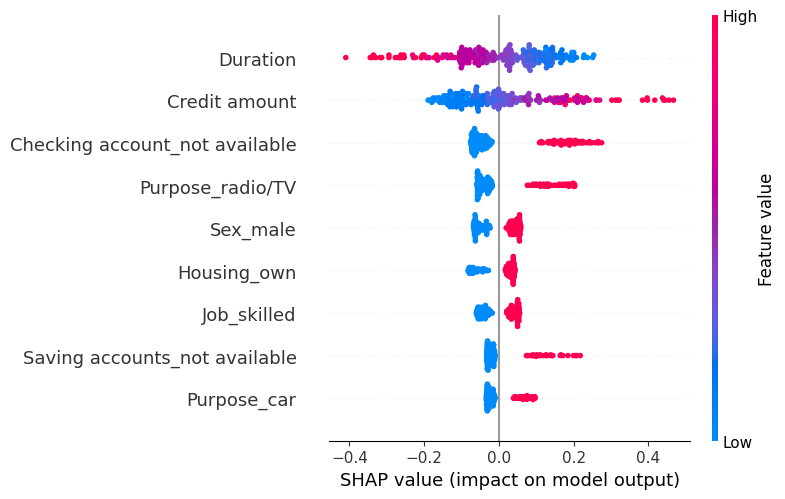

In [122]:
from shap import summary_plot
summary_plot(shap_values, max_display = 9)

In [74]:
abs_shap_values = np.abs(shap_values.values)

# Average absolute SHAP values for each feature
feature_importance = np.mean(abs_shap_values, axis=0)
#--
feature_impacts = np.mean(abs_shap_values, axis=0)

In [75]:
feature_impacts

array([0.01602273, 0.10917175, 0.10937181, 0.01269252, 0.04701689,
       0.01422141, 0.04270319, 0.01271808, 0.01643857, 0.0335848 ,
       0.00130896, 0.00538313, 0.02660345, 0.06970812, 0.000314  ,
       0.        , 0.00166821, 0.01111843, 0.03568616, 0.01375713,
       0.01448252, 0.02919784, 0.01544962, 0.09201267, 0.01935844,
       0.01354644, 0.04221058, 0.00041221, 0.0319135 ])

In [76]:
feature_importance.size

29

In [77]:
feature_names

Index(['Age', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_not available',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_not available', 'Checking account_rich',
       'Job_highly skilled', 'Job_skilled', 'Job_unskilled (non-resident)',
       'Job_unskilled (resident)'],
      dtype='object')

In [78]:
shap_df = pd.DataFrame(shap_values.values, columns=x_test.columns)
shap_df.to_csv('shap_values.csv', index=False)

In [79]:
feature_importance

array([0.01602273, 0.10917175, 0.10937181, 0.01269252, 0.04701689,
       0.01422141, 0.04270319, 0.01271808, 0.01643857, 0.0335848 ,
       0.00130896, 0.00538313, 0.02660345, 0.06970812, 0.000314  ,
       0.        , 0.00166821, 0.01111843, 0.03568616, 0.01375713,
       0.01448252, 0.02919784, 0.01544962, 0.09201267, 0.01935844,
       0.01354644, 0.04221058, 0.00041221, 0.0319135 ])

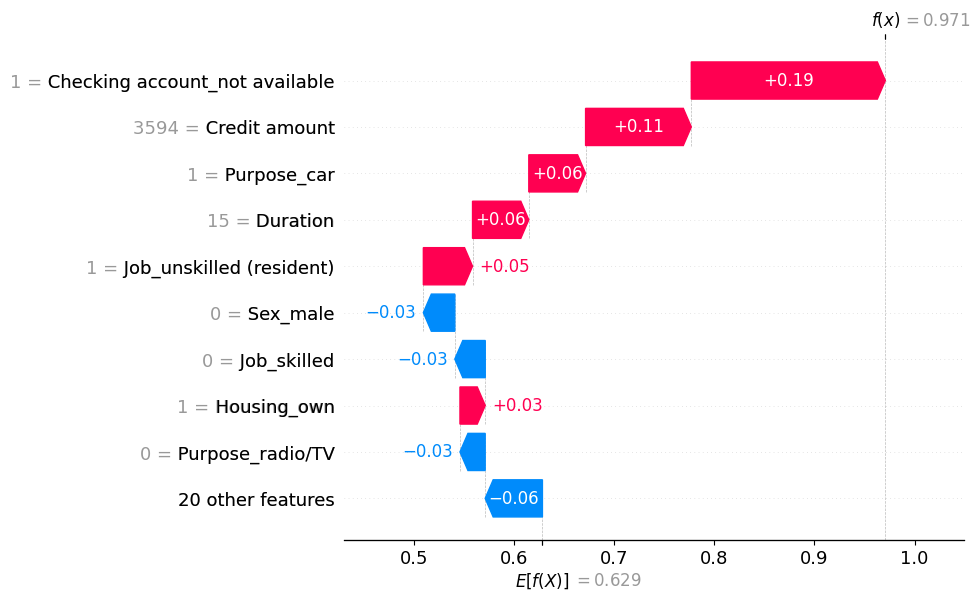

Prediction: bad
Most influential feature : Checking account_not available  its value was = 1.0


In [80]:
def explain_instance(shap_values, x_test_np, feature_names, index):
  """
  This function takes an index and displays the SHAP waterfall plot for
  the corresponding prediction instance.

  Args:
      shap_values: The SHAP values for the entire test set.
      x_test_np: The NumPy array of the test data features.
      feature_names: A list of feature names corresponding to x_test_np columns.
      index: The index of the prediction instance to explain.
  """

  try:
    if index < 0 or index >= len(shap_values):
      raise ValueError("Invalid index. Please enter a value between 0 and {}".format(len(shap_values) - 1))

    shap_value = shap_values.values[index]
    instance = x_test_np[index]

    # Check if shap.waterfall is available in your SHAP version
    if hasattr(shap.plots, 'waterfall'):
      shap.plots.waterfall(shap_values[index], max_display=10)
    else:
      print("shap.waterfall is not available in your SHAP version. Consider using alternative visualization libraries.")
 # Extract prediction class (assuming model prediction is binary)
    prediction = np.argmax(shap_value)  # Assuming prediction is at index 0
    prediction_label = "good" if prediction == 1 else "bad"

    # Find most influential feature (absolute value of SHAP values)
    top_feature_index = abs(shap_value).argmax()
    top_feature_name = feature_names[top_feature_index]
    top_feature_value = instance[top_feature_index]

    print("Prediction:", prediction_label)
    print("Most influential feature :", top_feature_name, " its value was =", top_feature_value)

  except ValueError as e:
    print(str(e))


explain_instance(shap_values, x_test_np, feature_names, 5)


In [81]:
# import tkinter as tk
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
# matplotlib.use('TkAgg') 

In [82]:
train = x_train.copy()
train['Risk'] = y_train
test = x_test.copy()
test['Risk actual'] = y_test
test['Risk predict'] = predictions_rounded
test

,Age,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,...,Checking account_little,Checking account_moderate,Checking account_not available,Checking account_rich,Job_highly skilled,Job_skilled,Job_unskilled (non-resident),Job_unskilled (resident),Risk actual,Risk predict
1212,29,1515,10,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,0
802,22,1670,9,True,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,1
422,35,1418,10,False,True,False,False,True,False,True,...,False,False,True,False,False,False,False,True,True,1
974,32,1284,24,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,0
808,30,2063,6,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,29,2108,6,False,True,False,False,True,False,False,...,False,False,True,False,False,True,False,False,True,1
486,29,683,6,True,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,1
624,24,433,6,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,1
221,23,3812,15,True,False,False,True,False,False,True,...,False,False,True,False,False,True,False,False,True,1


In [83]:
train

,Age,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,...,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_not available,Checking account_rich,Job_highly skilled,Job_skilled,Job_unskilled (non-resident),Job_unskilled (resident),Risk
32,26,1158,12,False,True,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
156,50,3777,24,False,True,False,True,False,False,False,...,True,False,False,True,False,False,True,False,False,True
723,28,2993,21,False,True,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,True
964,23,4278,32,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
277,49,5801,12,False,True,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,25,972,18,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1095,21,3057,24,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1130,34,3924,24,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
860,40,3857,30,False,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [84]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv',index=False)

In [85]:
# def create_plot():
#     plt.figure(figsize=(8, 6))  # Customize plot size as needed
#     plt.scatter(train['Age'], train['Credit amount'], alpha=0.3)
#     plt.xlabel("Age")
#     plt.ylabel("Credit Amount")
#     plt.title("Age vs. Credit Amount")

#     # Create a FigureCanvasTkAgg object to embed the plot
#     figure = plt.gcf()  # Get the current matplotlib figure
#     canvas = FigureCanvasTkAgg(figure, master=root)  # Associate with root window

#     canvas.get_tk_widget().pack(side="top", fill=tk.BOTH, expand=True)

#     # Convert matplotlib figure to a photoimage for display
#     fig_photo = canvas.figure_to_image(plt.gcf())
#     img = tk.PhotoImage(image=fig_photo)

#     # Clear previous image (if any) and display the new plot
#     canvas.delete("all")
#     canvas.create_image(0, 0, anchor="nw", image=img)

#     # Optionally, prevent memory leaks (discuss with matplotlib devs)
#     plt.close(plt.gcf())  # Consider if necessary based on matplotlib version
    

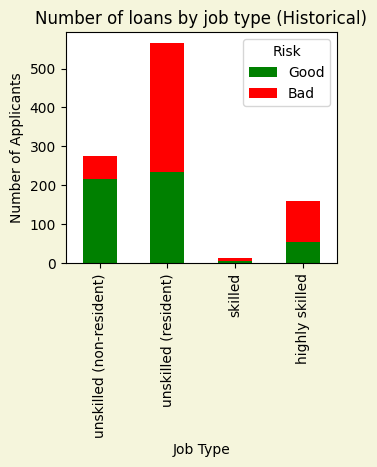

In [86]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

def create_plot(train, job_labels):
    job_columns = ['Job_highly skilled', 'Job_skilled', 'Job_unskilled (non-resident)', 'Job_unskilled (resident)']
    train['Job'] = train[job_columns].idxmax(axis=1).apply(lambda x: x.replace('Job_', ''))

    grouped_data = train.groupby(["Job", "Risk"]).size().unstack().fillna(0)

    fig = Figure(figsize=(3.5, 3), facecolor='#F5F5DC')
    ax = fig.add_subplot()
    grouped_data.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])
    ax.set_xlabel('Job Type')
    ax.set_ylabel('Number of Applicants')
    #ax.set_title('Risk Distribution by Job Type')
    ax.set_xticks(range(len(job_labels)))
    ax.set_xticklabels([job_labels[i] for i in range(len(job_labels))])
    ax.legend(title='Risk', labels=['Good', 'Bad'])
    ax.set_title("Number of loans by job type (Historical)")
    return fig

create_plot(train,job_labels)

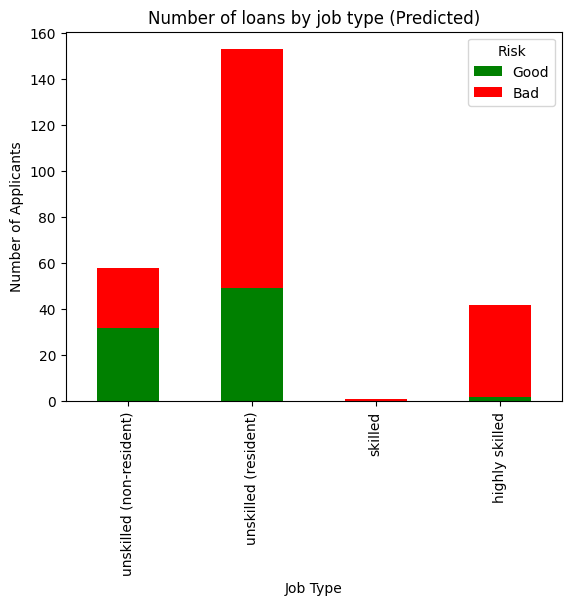

In [155]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

def create_plot2(test, job_labels):
    job_columns = ['Job_highly skilled', 'Job_skilled', 'Job_unskilled (non-resident)', 'Job_unskilled (resident)']
    test['Job'] = test[job_columns].idxmax(axis=1).apply(lambda x: x.replace('Job_', ''))

    grouped_data = test.groupby(["Job", "Risk predict"]).size().unstack().fillna(0)

    fig = Figure()
    ax = fig.add_subplot()
    grouped_data.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])
    ax.set_xlabel('Job Type')
    ax.set_ylabel('Number of Applicants')
    #ax.set_title('Risk Distribution by Job Type')
    ax.set_xticks(range(len(job_labels)))
    ax.set_xticklabels([job_labels[i] for i in range(len(job_labels))])
    ax.legend(title='Risk', labels=['Good', 'Bad'])
    ax.set_title("Number of loans by job type (Predicted)")
    return fig

create_plot2(test,job_labels)

In [88]:
job_labels

{0: 'unskilled (non-resident)',
 1: 'unskilled (resident)',
 2: 'skilled',
 3: 'highly skilled'}

In [89]:
# def create_job_risk_plot(train):
#     job_columns = ['Job_highly skilled', 'Job_skilled', 'Job_unskilled (non-resident)', 'Job_unskilled (resident)']
#     train['Job'] = train[job_columns].idxmax(axis=1).apply(lambda x: x.replace('Job_', ''))
#     grouped_data = train.groupby(["Job", "Risk"]).size().unstack().fillna(0)

#     fig = Figure(figsize=(3.5, 3), facecolor='#F5F5DC')
#     ax = fig.add_subplot()
#     grouped_data.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])

#     ax.set_xlabel('Job Type')
#     ax.set_ylabel('Number of Applicants')
#     #ax.set_title('Risk Distribution by Job Type')
#     ax.legend(title='Risk', labels=['Good', 'Bad'])

#     plt.tight_layout()

#     return fig

# create_job_risk_plot(train)

In [90]:

# def create_job_risk_plot(train, job_labels):

#     grouped_data = train.groupby(["Job", "Risk"]).size().unstack().fillna(0)

#     fig = Figure(figsize=(3.5, 3), facecolor='#F5F5DC')
#     ax = fig.add_subplot()
#     grouped_data.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])

#     ax.set_xlabel('Job Type')
#     ax.set_ylabel('Number of Applicants')
#     #ax.set_title('Risk Distribution by Job Type')
#     ax.set_xticks(range(len(job_labels)))
#     ax.set_xticklabels([job_labels[i] for i in range(len(job_labels))])
#     ax.legend(title='Risk', labels=['Good', 'Bad'])
#     ax.set_title("Number of loans by job type (Historical)")
#     plt.tight_layout()

#     return fig


# create_job_risk_plot(train,job_labels)

In [91]:

# def create_job_risk_plot2(test, job_labels):

#     grouped_data = test.groupby(["Job", "Risk predict"]).size().unstack().fillna(0)

#     fig = Figure(figsize=(3.5, 3), facecolor='#F5F5DC')
#     ax = fig.add_subplot()
#     grouped_data.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])

#     ax.set_xlabel('Job Type')
#     ax.set_ylabel('Number of Applicants')
#     #ax.set_title('Risk Distribution by Job Type')
#     ax.set_xticks(range(len(job_labels)))
#     ax.set_xticklabels([job_labels[i] for i in range(len(job_labels))])
#     ax.legend(title='Risk', labels=['Good', 'Bad'])
#     ax.set_title("Number of loans by job type (Predicted)")

#     plt.tight_layout()

#     return fig


# create_job_risk_plot2(test,job_labels)

In [92]:
train.columns

Index(['Age', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_not available',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_not available', 'Checking account_rich',
       'Job_highly skilled', 'Job_skilled', 'Job_unskilled (non-resident)',
       'Job_unskilled (resident)', 'Risk', 'Job'],
      dtype='object')

In [93]:
test.columns

Index(['Age', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_not available',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_not available', 'Checking account_rich',
       'Job_highly skilled', 'Job_skilled', 'Job_unskilled (non-resident)',
       'Job_unskilled (resident)', 'Risk actual', 'Risk predict', 'Job'],
      dtype='object')

In [94]:
# def plot_loan_counts_by_purpose(df, top_n):
#   colors = ['b', 'g', 'r', 'purple']

#   purpose_columns = df.filter(like='Purpose')

#   purpose_counts = purpose_columns.sum(axis=0)

#   purpose_counts = purpose_counts.sort_values(ascending=False)

#   top_purposes = purpose_counts.index[:top_n]
#   top_counts = purpose_counts.iloc[:top_n]

#   other_count = purpose_counts.iloc[top_n:].sum()
#   fig= Figure(figsize=(10,10), facecolor='#E5D7BD')
#   ax = fig.add_subplot()
  

#   ax.bar(top_purposes, top_counts, color=colors[:top_n])

#   ax.bar(["Other"], [other_count], color=colors[-1])

#   ax.set_xlabel("Purpose Type")
#   ax.set_ylabel("Number of Loans")
#   ax.set_title(f"Number of Loans by Top {top_n} Purpose Types")
#   plt.xticks(rotation=45, ha='right')  
#   plt.tight_layout()
#   return fig
# plot_loan_counts_by_purpose(train,3)  


In [95]:
x_train.columns

Index(['Age', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Purpose_business',
       'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_not available',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_not available', 'Checking account_rich',
       'Job_highly skilled', 'Job_skilled', 'Job_unskilled (non-resident)',
       'Job_unskilled (resident)'],
      dtype='object')

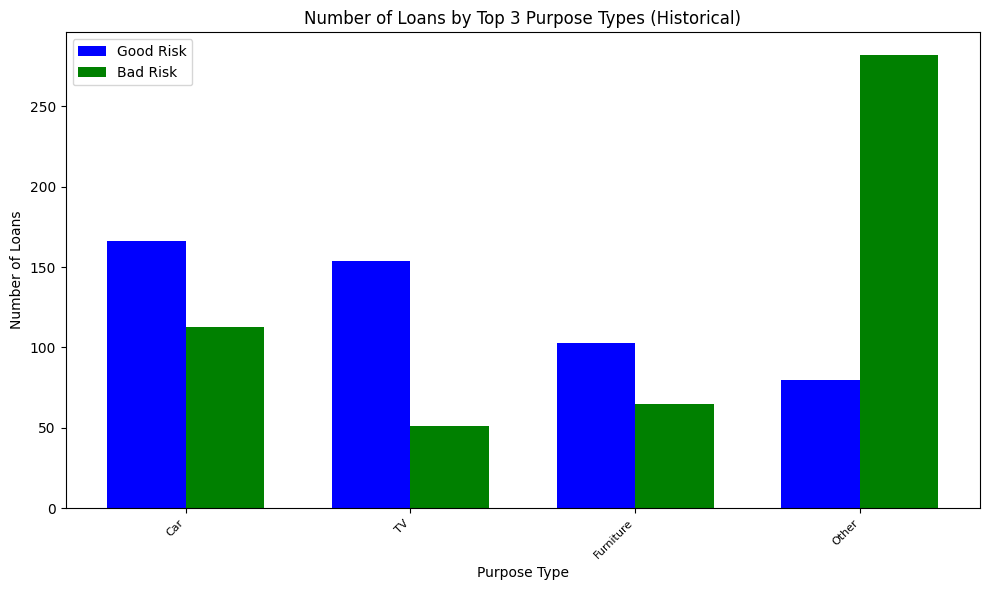

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_loan_counts_by_purpose(df, top_n=3, figsize=(10, 6)):
    """
    Plots the number of loans by each purpose type in a one-hot encoded dataframe,
    highlighting the top N and grouping the rest into an "Other" category.

    Args:
        df: The pandas dataframe containing the one-hot encoded data.
        top_n: The number of top purpose types to display individually (default: 3).
        figsize: A tuple representing the figure size (width, height) for the plot.
    """
    # Define a color list for bars
    colors = ['b', 'g', 'r', 'purple', 'orange']  # Modify this list for desired colors

    # Select the columns containing purpose types (one-hot encoded)
    purpose_columns = df.filter(like='Purpose')

    # Sum the values across each column to get the count of loans for each purpose
    purpose_counts = purpose_columns.sum(axis=0)

    # Sort purpose counts by value in descending order
    purpose_counts = purpose_counts.sort_values(ascending=False)

    # Select the top N purpose types
    top_purposes = purpose_counts.index[:top_n]
    top_counts = purpose_counts.iloc[:top_n]

    # Calculate the total count of loans for other purposes
    other_count = purpose_counts.iloc[top_n:].sum()

    purpose_label_map = {
        "Purpose_car": "Car",
        "Purpose_business": "Business",
        "Purpose_radio/TV": "TV",
        "Purpose_furniture/equipment": "Furniture",
        "Purpose_domestic appliances": "Appliances",
        "Purpose_repairs": "Repairs",
        "Purpose_vacation/others": "Vacation",
        "Purpose_education": "Education"
    }

    # Shorten purpose labels for plotting
    shortened_labels = [purpose_label_map.get(label, label) for label in top_purposes]

    # Group by purpose and risk to count good and bad loans
    good_counts = []
    bad_counts = []
    for purpose in top_purposes:
        good_count = df[(df[purpose] == 1) & (df['Risk'] == True)].shape[0]
        bad_count = df[(df[purpose] == 1) & (df['Risk'] == False)].shape[0]
        good_counts.append(good_count)
        bad_counts.append(bad_count)

    # Adding the "Other" category
    other_good_count = df[(df[top_purposes] == 0).all(axis=1) & (df['Risk'] == True)].shape[0]
    other_bad_count = df[(df[top_purposes] == 0).all(axis=1) & (df['Risk'] == False)].shape[0]
    good_counts.append(other_good_count)
    bad_counts.append(other_bad_count)
    shortened_labels.append("Other")

    # Create a figure and an axis
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the bar chart
    bar_width = 0.35
    index = range(len(shortened_labels))

    bar1 = ax.bar(index, good_counts, bar_width, label='Good Risk', color=colors[0])
    bar2 = ax.bar([i + bar_width for i in index], bad_counts, bar_width, label='Bad Risk', color=colors[1])

    ax.set_xlabel("Purpose Type")
    ax.set_ylabel("Number of Loans")
    ax.set_title(f"Number of Loans by Top {top_n} Purpose Types (Historical)")
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(shortened_labels, rotation=45, ha='right', fontsize=8)
    ax.legend()

    plt.tight_layout()
# Assuming your encoded dataframe is stored in a variable called 'df'
plot_loan_counts_by_purpose(train, top_n=3)
plt.show()


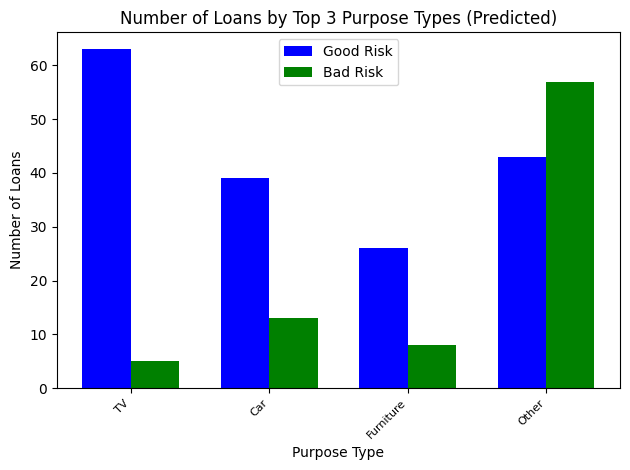

In [156]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_loan_counts_by_purpose2(df, top_n=3, figsize=(3.5, 3)):
    """
    Plots the number of loans by each purpose type in a one-hot encoded dataframe,
    highlighting the top N and grouping the rest into an "Other" category.

    Args:
        df: The pandas dataframe containing the one-hot encoded data.
        top_n: The number of top purpose types to display individually (default: 3).
        figsize: A tuple representing the figure size (width, height) for the plot.
    """
    # Define a color list for bars
    colors = ['b', 'g', 'r', 'purple', 'orange']  # Modify this list for desired colors

    # Select the columns containing purpose types (one-hot encoded)
    purpose_columns = df.filter(like='Purpose')

    # Sum the values across each column to get the count of loans for each purpose
    purpose_counts = purpose_columns.sum(axis=0)

    # Sort purpose counts by value in descending order
    purpose_counts = purpose_counts.sort_values(ascending=False)

    # Select the top N purpose types
    top_purposes = purpose_counts.index[:top_n]
    top_counts = purpose_counts.iloc[:top_n]

    # Calculate the total count of loans for other purposes
    other_count = purpose_counts.iloc[top_n:].sum()

    purpose_label_map = {
        "Purpose_car": "Car",
        "Purpose_business": "Business",
        "Purpose_radio/TV": "TV",
        "Purpose_furniture/equipment": "Furniture",
        "Purpose_domestic appliances": "Appliances",
        "Purpose_repairs": "Repairs",
        "Purpose_vacation/others": "Vacation",
        "Purpose_education": "Education"
    }

    # Shorten purpose labels for plotting
    shortened_labels = [purpose_label_map.get(label, label) for label in top_purposes]

    # Group by purpose and risk to count good and bad loans
    good_counts = []
    bad_counts = []
    for purpose in top_purposes:
        good_count = df[(df[purpose] == 1) & (df['Risk predict'] == 1)].shape[0]
        bad_count = df[(df[purpose] == 1) & (df['Risk predict'] == 0)].shape[0]
        good_counts.append(good_count)
        bad_counts.append(bad_count)

    # Adding the "Other" category
    other_good_count = df[(df[top_purposes] == 0).all(axis=1) & (df['Risk predict'] == 1)].shape[0]
    other_bad_count = df[(df[top_purposes] == 0).all(axis=1) & (df['Risk predict'] == 0)].shape[0]
    good_counts.append(other_good_count)
    bad_counts.append(other_bad_count)
    shortened_labels.append("Other")

    # Create a figure and an axis
    fig, ax = plt.subplots()

    # Plot the bar chart
    bar_width = 0.35
    index = range(len(shortened_labels))

    bar1 = ax.bar(index, good_counts, bar_width, label='Good Risk', color=colors[0])
    bar2 = ax.bar([i + bar_width for i in index], bad_counts, bar_width, label='Bad Risk', color=colors[1])

    ax.set_xlabel("Purpose Type")
    ax.set_ylabel("Number of Loans")
    ax.set_title(f"Number of Loans by Top {top_n} Purpose Types (Predicted)")
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(shortened_labels, rotation=45, ha='right', fontsize=8)
    ax.legend()

    plt.tight_layout()
# Assuming your encoded dataframe is stored in a variable called 'df'
plot_loan_counts_by_purpose2(test, top_n=3)
plt.show()


In [98]:
feature_names = x_train.columns
abs_shap_values = np.abs(shap_values.values)
mean_abs_shap = np.mean(abs_shap_values, axis=0)

# Sort features by mean absolute SHAP in descending order
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': mean_abs_shap})
feature_importance = feature_importance.sort_values(by=['importance'], ascending=False)


In [99]:
n = 5  # Adjust 'n' as needed to show the desired number of features

top_positive = feature_importance.head(n)
top_negative = feature_importance.tail(n)

print("Top Positive Influencing Features:")
print(top_positive[['feature', 'importance']].to_string(index=False))

print("\nTop Negative Influencing Features:")
print(top_negative[['feature', 'importance']].to_string(index=False))


Top Positive Influencing Features:
                       feature  importance
                      Duration    0.109372
                 Credit amount    0.109172
Checking account_not available    0.092013
              Purpose_radio/TV    0.069708
                      Sex_male    0.047017

Top Negative Influencing Features:
                     feature  importance
      Saving accounts_little    0.001668
 Purpose_domestic appliances    0.001309
Job_unskilled (non-resident)    0.000412
             Purpose_repairs    0.000314
     Purpose_vacation/others    0.000000


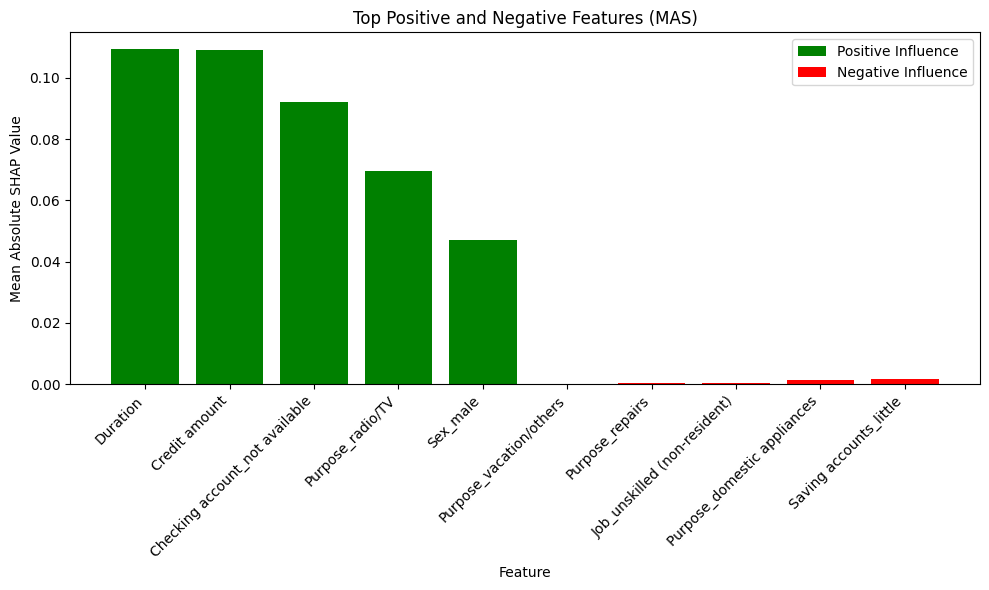

In [100]:
import matplotlib.pyplot as plt

# Get top positive and negative features
n = 5  # Adjust 'n' as needed to show the desired number of features
top_positive = feature_importance.head(n)
top_negative = feature_importance.tail(n)

# Prepare data for bar chart
positive_features = top_positive['feature'].to_numpy()
positive_importance = top_positive['importance'].to_numpy()
negative_features = top_negative['feature'].to_numpy()[::-1]  # Reverse order for negative features
negative_importance = top_negative['importance'].to_numpy()[::-1]

# Create bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Positive features (green)
plt.bar(positive_features, positive_importance, color='green', label='Positive Influence')

# Negative features (red)
plt.bar(negative_features, negative_importance, color='red', label='Negative Influence')

# Customize plot
plt.xticks(rotation=45, ha='right')  # Rotate feature labels for readability
plt.xlabel('Feature')
plt.ylabel('Mean Absolute SHAP Value')
plt.title('Top Positive and Negative Features (MAS)')
plt.legend()
plt.tight_layout()

# Display plot
plt.show()

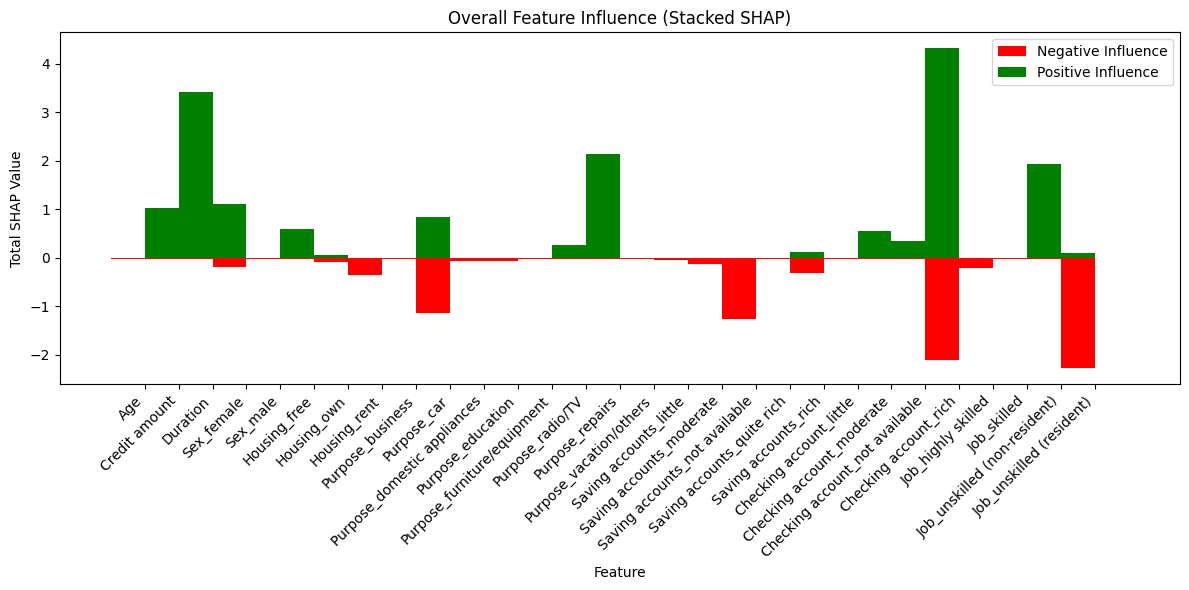

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def plot_overall_feature_influence(shap_values, feature_names):
  """
  Plots a stacked bar chart for all features, showing positive and negative SHAP values.

  Args:
      shap_values: A NumPy array of SHAP values, where each row represents an instance.
      feature_names: A list of feature names.
  """
  n_features = len(feature_names)
  n_instances = shap_values.shape[0]

  # Calculate total SHAP values for each feature (positive and negative)
  feature_shap_sum = np.sum(shap_values, axis=0)  # Use sum (not abs) to preserve sign
  positive_shap_sum = np.maximum(feature_shap_sum, 0)
  negative_shap_sum = np.minimum(feature_shap_sum, 0)

  # Ensure negative values are displayed even if total is small
  min_negative_value = np.min(negative_shap_sum[negative_shap_sum != 0])  # Find minimum non-zero negative value
  negative_shap_sum[negative_shap_sum == 0] = min_negative_value / 100  # Set small negative values for zero sums

  bar_width = 0.8  # Adjust bar width as needed
  x_positions = np.arange(n_features) * bar_width

  plt.figure(figsize=(12, 6))  # Adjust figure size as needed

  # Negative influence (bottom layer)
  plt.bar(x_positions - bar_width/2, negative_shap_sum, width=bar_width, color='red', label='Negative Influence')

  # Positive influence (top layer)
  plt.bar(x_positions + bar_width/2, positive_shap_sum, width=bar_width, color='green', label='Positive Influence')

  # Customize plot
  plt.xticks(x_positions, feature_names, rotation=45, ha='right')  # Rotate feature labels for readability
  plt.xlabel('Feature')
  plt.ylabel('Total SHAP Value')
  plt.title('Overall Feature Influence (Stacked SHAP)')
  plt.legend()
  plt.tight_layout()

  # Display plot
  plt.show()

# Assuming you have already calculated SHAP values (shap_values) and feature names
plot_overall_feature_influence(shap_values.values, feature_names)


In [102]:
feature_names[3]

'Sex_female'

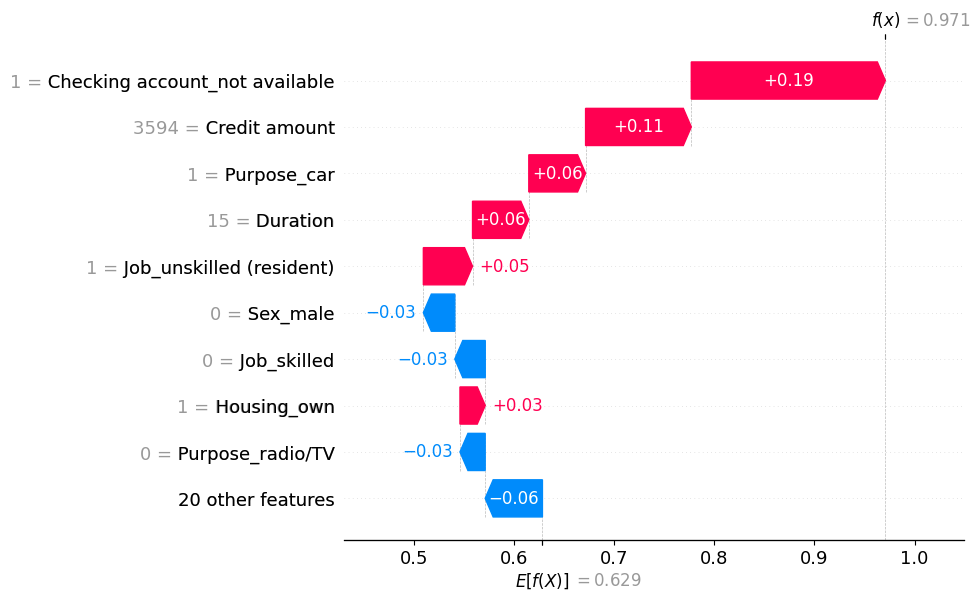

**Explanation for Instance 5**
The model predicted that there is a : 97.0% that this customer is a good risk therefore advices to give them the loan
E[f(X)] (Expected Model Output): [0.62850776]
E[f(X)] is the average prediction of the model would when all the features impacts are averaged out 
 Showing how can an indiviual feature shift the prediction one way
Most Influential Feature: Checking account_not available (+0.1937)


In [123]:
def explain_instance(model, shap_values, predictions, index, feature_names):
  # Get SHAP values for the instance
  instance_shap_values = shap_values.values[index]

  # Calculate base value (expected model output)
  base_value = shap_values.base_values[index]

  # Explain the instance using waterfall plot
  shap.plots.waterfall(shap_values[index])

  # Identify the most influential feature (absolute SHAP value)
  most_influential_feature_index = np.abs(instance_shap_values).argmax()
  most_influential_feature = feature_names[most_influential_feature_index]
  most_influential_value = instance_shap_values[most_influential_feature_index]

  # Print explanation
  predicted_value = predictions[index][0]
  predicted_value = predicted_value*100
  predicted_value = predicted_value.round()
  print(f"**Explanation for Instance {index}**")
  if(predicted_value>=50):
    print(f"The model predicted that there is a : {predicted_value}% that this customer is a good risk therefore advices to give them the loan")
  else:
    print(f"The model predicted that there is a : {predicted_value}% that this customer is a bad risk therefore advices to not give them the loan")
  print(f"E[f(X)] (Expected Model Output): {base_value}")
  print ("E[f(X)] is the average prediction of the model would when all the features impacts are averaged out \n Showing how can an indiviual feature shift the prediction one way")
  print(f"Most Influential Feature: {most_influential_feature} ({'+' if most_influential_value > 0 else ''}{most_influential_value:.4f})")  # Format value with sign

  # Additional context (optional)
  # You can add code here to analyze the impact of the most influential feature
  # based on its value and feature type (e.g., high income for loan approval)

# Assuming you have a trained model, SHAP values, predictions, desired index, and feature names
explain_instance(model, shap_values, predictions, 5, feature_names)

In [138]:
import numpy as np

def evaluate_stability(shap_values, y_true):
    stability_results = {}
    classes = np.unique(y_true)

    for cls in classes:
        cls_indices = np.where(y_true == cls)[0]
        cls_shap_values = shap_values.values[cls_indices]
        stability_results[cls] = np.std(cls_shap_values, axis=0)
    
    return stability_results

stability_results = evaluate_stability(shap_values, y_test)
stability_results

{False: array([1.96690251e-02, 1.64336770e-01, 1.49000185e-01, 1.53960115e-02,
        5.28066594e-02, 3.63628744e-02, 5.28280408e-02, 1.66938050e-02,
        2.76337302e-02, 3.82659910e-02, 1.57898892e-04, 1.34898386e-02,
        4.30243704e-02, 8.11541963e-02, 2.01627778e-05, 0.00000000e+00,
        2.09990457e-03, 1.75866438e-02, 4.95504064e-02, 1.96224348e-02,
        2.45309750e-02, 3.68035751e-02, 2.10464580e-02, 6.46180769e-02,
        2.39547484e-02, 2.17256627e-02, 4.79241385e-02, 9.40203982e-03,
        2.82507875e-02]),
 True: array([0.01970672, 0.11779817, 0.11125688, 0.01302689, 0.03875506,
        0.02781   , 0.03572249, 0.01906457, 0.04398379, 0.03953462,
        0.00843531, 0.01119308, 0.03917704, 0.08478658, 0.00217913,
        0.        , 0.00142288, 0.02088853, 0.05247122, 0.03765547,
        0.04157599, 0.02832777, 0.01907776, 0.11768051, 0.02899508,
        0.02600084, 0.03716898, 0.        , 0.03929114])}

In [135]:
from scipy.spatial.distance import cdist

def evaluate_separability(shap_values, y_true):
    """
    Evaluates the separability of SHAP values.

    Args:
        shap_values: The SHAP values for each instance.
        y_true: The true class labels for each instance.

    Returns:
        A dictionary with the average distances between SHAP values of different classes.
    """
    separability_results = {}
    classes = np.unique(y_true)

    for i, cls1 in enumerate(classes):
        for j, cls2 in enumerate(classes):
            if i < j:
                cls1_indices = np.where(y_true == cls1)[0]
                cls2_indices = np.where(y_true == cls2)[0]
                cls1_shap_values = shap_values[cls1_indices]
                cls2_shap_values = shap_values[cls2_indices]
                distance = cdist(cls1_shap_values, cls2_shap_values, metric='euclidean').mean()
                separability_results[(cls1, cls2)] = distance
    
    return separability_results

# Assuming `shap_values` is a numpy array of shape (num_samples, num_features)
# and `y_test` is the true class labels
separability_results = evaluate_separability(shap_values.values, y_test)
separability_results


{(False, True): 0.40232182827342455}

In [151]:
def evaluate_bias(shap_values, sensitive_attribute_values):
    """
    Evaluates bias in SHAP values.

    Args:
        shap_values: The SHAP values for each instance.
        sensitive_attribute_values: The values of the sensitive attribute for each instance.

    Returns:
        A dictionary with the mean SHAP values for each group defined by the sensitive attribute.
    """
    bias_results = {}
    groups = np.unique(sensitive_attribute_values)

    for group in groups:
        group_indices = np.where(sensitive_attribute_values == group)[0]
        group_shap_values = shap_values[group_indices]
        bias_results[group] = np.mean(group_shap_values, axis=0)
    
    return bias_results

# Assuming `shap_values` is a numpy array of shape (num_samples, num_features)
# and `sensitive_attribute` is the sensitive attribute values
sensitive_attribute = test['Sex_male']  # Example for gender
bias_results = evaluate_bias(shap_values.values, sensitive_attribute)
bias_results 


{False: array([ 7.51513628e-03,  1.17357367e-02,  5.02468589e-03,  9.90347830e-03,
        -5.21008475e-02, -3.74351267e-03, -1.29720652e-02,  1.68285256e-03,
         4.07187127e-04, -8.70803135e-03, -2.20266641e-04,  2.09046788e-04,
         2.61983205e-04, -1.06864041e-02,  2.52809045e-06,  0.00000000e+00,
        -2.81707839e-04, -2.29363648e-03, -8.35192739e-03, -3.42322618e-03,
        -2.74576774e-03, -9.35007822e-04, -2.07555986e-03, -4.30673909e-03,
        -1.25039197e-02, -2.45236134e-03,  4.83357597e-03,  0.00000000e+00,
        -1.61564798e-02]),
 True: array([ 1.44330932e-03,  1.47158447e-02,  3.85222182e-03, -8.80675805e-03,
         4.31951634e-02,  3.15555119e-03,  9.20949190e-03, -3.71098252e-03,
         5.43659033e-03, -1.25306522e-03, -2.60421130e-04, -6.52352957e-04,
         1.59116199e-03,  2.27874752e-02, -2.21671369e-04,  0.00000000e+00,
        -3.87230236e-05,  7.71984110e-04, -2.49215212e-03,  3.42005680e-03,
        -1.71669666e-04,  4.48577252e-03,  3.985

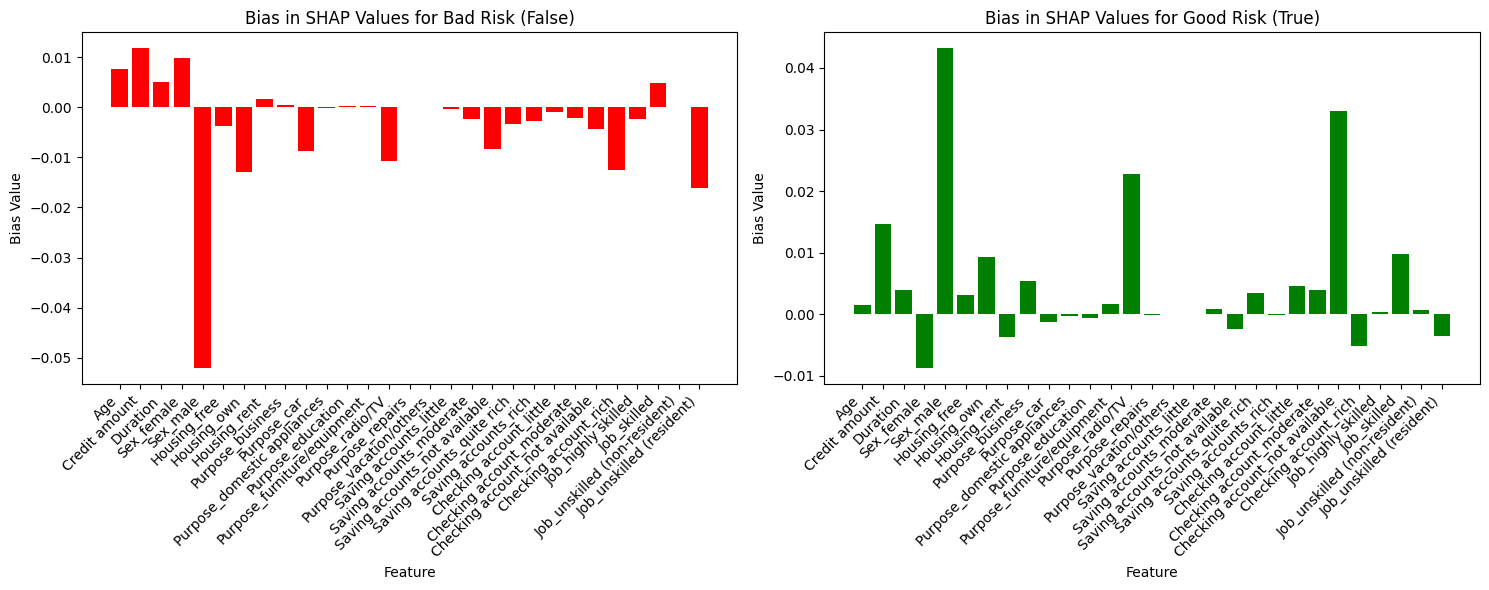

In [148]:
def plot_bias_results(bias_results, feature_names):
    # Extract the bias values for True and False
    bias_false = bias_results[False]
    bias_true = bias_results[True]

    # Generate indices for the features
    features = np.arange(len(bias_false))
    feature_labels = feature_names

    # Create a figure and subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Plot the bias results for False (bad risk)
    axes[0].bar(features, bias_false, color='red')
    axes[0].set_xlabel('Feature')
    axes[0].set_ylabel('Bias Value')
    axes[0].set_title('Bias in SHAP Values for Bad Risk (False)')
    axes[0].set_xticks(features)
    axes[0].set_xticklabels(feature_labels, rotation=45, ha='right')

    # Plot the bias results for True (good risk)
    axes[1].bar(features, bias_true, color='green')
    axes[1].set_xlabel('Feature')
    axes[1].set_ylabel('Bias Value')
    axes[1].set_title('Bias in SHAP Values for Good Risk (True)')
    axes[1].set_xticks(features)
    axes[1].set_xticklabels(feature_labels, rotation=45, ha='right')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

feature_names = x_test.columns
plot_bias_results(bias_results, feature_names)


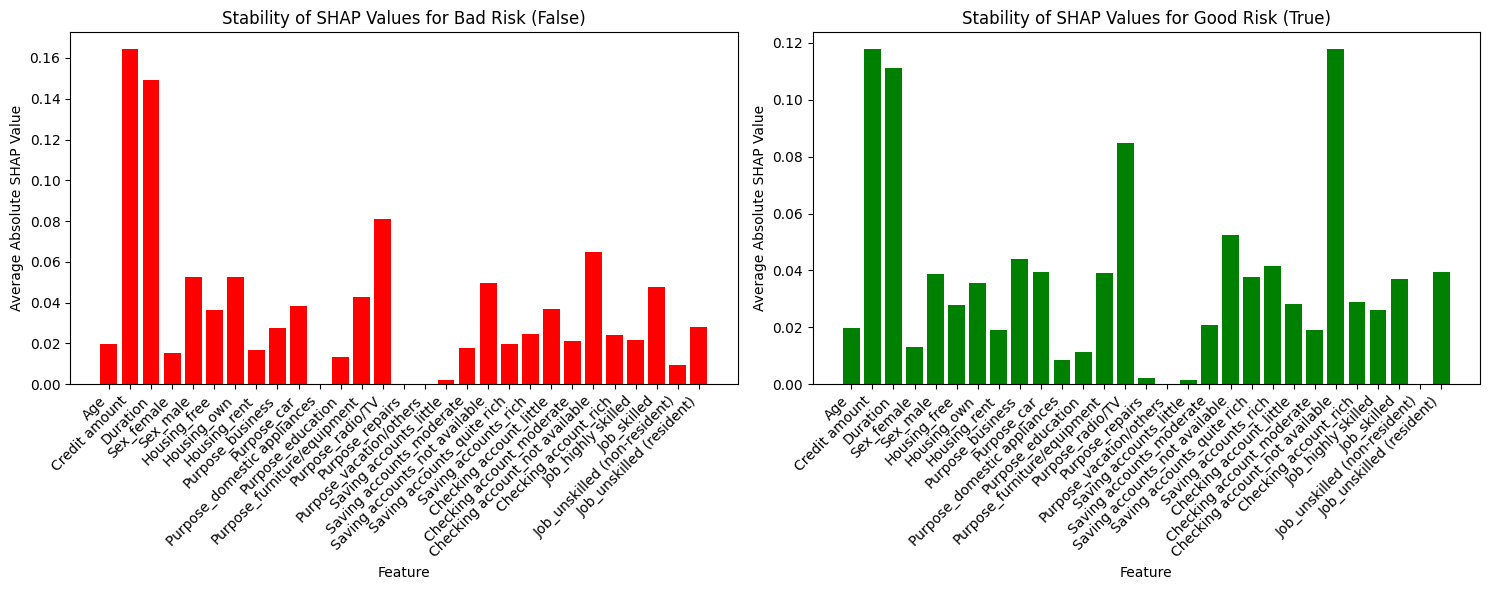

In [147]:
import matplotlib.pyplot as plt
import numpy as np

def plot_stability_results(stability_results, feature_names):
    # Extract the stability values for True and False
    stability_false = stability_results[False]
    stability_true = stability_results[True]

    # Generate indices for the features
    features = np.arange(len(stability_false))
    feature_labels = feature_names

    # Create a figure and subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Plot the stability results for False (bad risk)
    axes[0].bar(features, stability_false, color='red')
    axes[0].set_xlabel('Feature')
    axes[0].set_ylabel('Average Absolute SHAP Value')
    axes[0].set_title('Stability of SHAP Values for Bad Risk (False)')
    axes[0].set_xticks(features)
    axes[0].set_xticklabels(feature_labels, rotation=45, ha='right')

    # Plot the stability results for True (good risk)
    axes[1].bar(features, stability_true, color='green')
    axes[1].set_xlabel('Feature')
    axes[1].set_ylabel('Average Absolute SHAP Value')
    axes[1].set_title('Stability of SHAP Values for Good Risk (True)')
    axes[1].set_xticks(features)
    axes[1].set_xticklabels(feature_labels, rotation=45, ha='right')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

feature_names = x_test.columns
plot_stability_results(stability_results, feature_names)


In [146]:
x_test.columns.size

29